In [1]:
# for the nlp, of course
import nltk
nltk.download('cmudict')

import re

# for the urls for our text importing
from bs4 import BeautifulSoup
import urllib.request

# and for graphing: 
import seaborn as sns
import matplotlib.pyplot as plt

# for looking at amiss words: 
from collections import Counter 

[nltk_data] Downloading package cmudict to
[nltk_data]     C:\Users\NoahDiekemper\AppData\Roaming\nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


In [2]:
from nltk.tokenize import word_tokenize 
from string import punctuation

# of course we'll make heavy use of this: 
mypunc = list(punctuation)
# and a unique constraint for this dataset: 
mypunc.append('--')

#print(mypunc)

In [3]:
# some cred to this fellow for the initial get-go:
# https://stackoverflow.com/questions/25714531/find-rhyme-using-nltk-in-python

# preparatory: 
thedict = nltk.corpus.cmudict.dict()

In [4]:
# what counts as a rhyme depends on vowels
# we use this reference for cues: 
# https://www.nltk.org/_modules/nltk/corpus/reader/cmudict.html

myvowels = ['AA', 'AH', 'AW', 'AE', 'AO', 'AY', 
         'EH', 'EY', 'ER', # the ER is perhaps controversial 
          # but I am convinced that the words here encoded with it as a final phoneme
          # all rhyme
          # e.g. occur and sir
         'IH', 'IY', 'OW', 'OY', 'UH', 'UW']

In [5]:
print('HellO'.lower())

hello


In [6]:
# here we define our rhyme-testing function: 

def test_rhyme(word_a = 'move', word_b = 'love'):
    # let's return a playfully named bool 
    orange = 0

    # and this dictionary is case-sensitive so . . .
    word_a = word_a.lower()
    word_b = word_b.lower()
    
    # we try the first word
    try:
        syll_a = thedict[word_a]
    except KeyError:
        fix_a = 'thedict[\'%s\'] = thedict[\'%s\']' % (word_a, word_a)
        print(fix_a)
        return word_a
    # we try the second word
    try:
        syll_b = thedict[word_b]
    except KeyError:
        fix_b = 'thedict[\'%s\'] = thedict[\'%s\']' % (word_b, word_b)
        print(fix_b)
        return word_b
    
    # do they rhyme?
    for pron_a in syll_a:
        # english needs the final vowel sounds to match
        # for a word to rhyme
        # hence: 
        vowel = 0
        jk = 1
        # we search from the end of the word backwards
        # looking for the final vowel sound
        while (vowel == 0):
            if " ".join(re.findall("[a-zA-Z]+", pron_a[-jk])) in myvowels:
                vowel = 1
            else:
                jk += 1

        # and now we carry on
        # looking for any homophonic ending that a and b share: 
        for pron_b in syll_b:
            presumptive = 1
            # and here we test each phoneme separately 
            # and set our sub-bool to false and break it if any one fails: 
            for i in range(jk):
                myindex = i + 1
                if (" ".join(re.findall("[a-zA-Z]+", pron_a[-myindex]))  != " ".join(re.findall("[a-zA-Z]+", pron_b[-myindex])) ):
                    presumptive = 0
                    break
            if presumptive == 1:
                orange = 1
                break
            
    # and we return our bool
    return orange

In [7]:
# test cases: expecting results 000 111 0 11

# don't rhyme these days: 
print(test_rhyme('love', 'move'))
print(test_rhyme('loved', 'moved'))
print(test_rhyme('loved', 'proved'))

# can still rhyme with the animal
print(test_rhyme('love', 'dove'))

# rhyme bc of their last sound only
print(test_rhyme('how', 'now'))
print(test_rhyme('now', 'cow'))

# don't
print(test_rhyme('brown', 'cow'))

# but do
print(test_rhyme('brown', 'crown'))
print(test_rhyme('free', 'legacy'))

0
0
0
1
1
1
0
1
1


In [8]:
# we use a dict to tell our code
# which lines of a sonnet are meant to rhyme with which
sonnet_dict={}
sonnet_dict[0] = 2
sonnet_dict[1] = 3
sonnet_dict[4] = 6
sonnet_dict[5] = 7
sonnet_dict[8] = 10
sonnet_dict[9] = 11
sonnet_dict[12] = 13

# "sonnet" 126 is just a bunch (6) of rhyming couplets
# so we account for that here
dozen_dict = {}
dozen_dict[0] = 1
dozen_dict[2] = 3
dozen_dict[4] = 5
dozen_dict[6] = 7
dozen_dict[8] = 9
dozen_dict[10] = 11

# sonnet 99 is irregular
# so we take that into account here
nena_dict = {}
nena_dict[0] = 2
nena_dict[1] = 3
nena_dict[2] = 4
nena_dict[5] = 7
nena_dict[6] = 8
nena_dict[9] = 11
nena_dict[10] = 12
nena_dict[13] = 14

In [9]:
# here are the relics of obsolete entries 
# that weren't in NLTK's dictionary at all
# that I pseudo-manually updated
# with words that rhyme with them

thedict['niggarding'] =      thedict['building']
thedict['renewest'] =        thedict['newest']
thedict['self-killed'] =     thedict['killed']
thedict['unprovident'] =     thedict['provident']
thedict['ruinate'] =         thedict['ate']
thedict['bestowest'] =       thedict['west']
thedict['convertest'] =      thedict['test']
thedict['untrimmd'] =        thedict['trimmed']
thedict['growest'] =         thedict['west']
thedict['amazeth'] =         thedict['death']
thedict['a-doting'] =        thedict['doting']
thedict['stelled'] =         thedict['felled']
thedict['toild'] =           thedict['toiled']
thedict['embassage'] =       thedict['ridge']
thedict['oer'] =             thedict['oar']
thedict['re-survey'] =       thedict['survey']
thedict['equipage'] =        thedict['page']
thedict['staineth'] =        thedict['death']
thedict['invocate'] =        thedict['mate']
thedict['deceivest'] =       thedict['vest']
thedict['refusest'] =        thedict['zest']
thedict['forbear'] =         thedict['bear']
thedict['unrespected'] =     thedict['respected']
thedict['recured'] =         thedict['recurred']
thedict['impanneled'] =      thedict['paneled']
thedict['uprear'] =          thedict['rear']
thedict['offence'] =         thedict['offense']
thedict['wilful-slow'] =     thedict['slow']
thedict['carcanet'] =        thedict['net']
thedict['allayd'] =          thedict['allayed']
thedict['nought'] =          thedict['ought']
thedict['cheque'] =          thedict['check']
thedict['crownd'] =          thedict['crowned']
thedict['oer-worn'] =        thedict['worn']
thedict['down-razed'] =      thedict['razed']
thedict['alack'] =           thedict['lack']
thedict['jollity'] =         thedict['quality']
thedict['strumpeted'] =      thedict['trumpeted']
thedict['impiety'] =         thedict['piety']
thedict['outworn'] =         thedict['worn']
thedict['crownd'] =          thedict['crowned']
thedict['anon'] =            thedict['on']
thedict['decayd'] =          thedict['decayed']
thedict['oer-read'] =        thedict['read']
thedict['oerlook'] =         thedict['look']
thedict['inhearse'] =        thedict['rehearse']
thedict['swerving'] =        thedict['serving']
thedict['attainted'] =       thedict['tainted']
thedict['offence'] =         thedict['offense']
thedict['after-loss'] =      thedict['loss']
thedict['wantonness'] =      thedict['dress']
thedict['deemd'] =           thedict['deemed']
thedict['intermixd'] =       thedict['intermixed']
thedict['esteeming'] =       thedict['teaming']
thedict['burnd'] =           thedict['burned']
thedict['dial-hand'] =       thedict['hand']
thedict['unbred'] =          thedict['bred']
thedict['wights'] =          thedict['nights']
thedict['prefiguring'] =     thedict['figuring']
thedict['staind'] =          thedict['stained']
thedict['renewd'] =          thedict['renewed']
thedict['greeing'] =         thedict['agreeing']
thedict['incertainty'] =     thedict['certainty']
thedict['meetness'] =        thedict['happiness']
thedict['tenderd'] =         thedict['tendered']
thedict['deemd'] =           thedict['deemed']
thedict['gatherd'] =         thedict['gathered']
thedict['honouring'] =       thedict['honoring']
thedict['savour'] =          thedict['savor']
thedict['growst'] =          thedict['most']
thedict['swayst'] =          thedict['waist']
thedict['gaol'] =            thedict['jail']
thedict['overplus'] =        thedict['plus']
thedict['fulfil'] =          thedict['fulfill']
thedict['reproving'] =       thedict['proving']
thedict['aright'] =          thedict['right']
thedict['new-fired'] =       thedict['fired']
thedict['viewest'] = thedict['west']
thedict['departest'] = thedict['test']
thedict['dimmd'] = thedict['dimmed']
thedict['owest'] = thedict['west']
thedict['gazeth'] = thedict['death']
thedict['foild'] = thedict['foiled']
thedict['vassalage'] = thedict['ledge']
thedict['disdaineth'] = thedict['death']
thedict['receivest'] = thedict['vest']
thedict['usest'] = thedict['zest']
thedict['esteemd'] = thedict['esteemed']
thedict['fixd'] = thedict['fixed']
thedict['turnd'] = thedict['turned']
thedict['reignd'] = thedict['reigned']
thedict['rememberd'] = thedict['remembered']
thedict['esteemd'] = thedict['esteemed']
thedict['unfatherd'] = thedict['bothered']
thedict['favour'] = thedict['favor']
thedict['showst'] = thedict['most']
thedict['playst'] = thedict['waist']

In [10]:
# and here's the hard-coded part
# where we gather our sonnets

sonnetlinks=[]
html_page = urllib.request.urlopen("http://shakespeare.mit.edu/Poetry/sonnets.html")
soup = BeautifulSoup(html_page, "html.parser")
for link in soup.findAll('a'):
    # and some particular scrubbing: 
    if 'amazon' not in link.get('href'):
        sonnetlinks.append('http://shakespeare.mit.edu/Poetry/' + link.get('href'))

In [11]:
def get_sonnet_text(mylink):
    html_page = urllib.request.urlopen(mylink)
    soup = BeautifulSoup(html_page, "html.parser")
    foundit = soup.text
    #print(foundit)
    return foundit

sonnettexts = []
for x in sonnetlinks:
    sonnettexts.append(get_sonnet_text(x))

In [12]:
# we strike the empty lines 
# and also the 'Sonnet x' title headings
sonnets = []
for each_sonnet in sonnettexts:
    working_sonnet = each_sonnet.split('\n')
    ourlines = [x for x in working_sonnet if x != '']
    ourlines = [x for x in ourlines if 'sonnet' not in x.lower()]
    sonnets.append(ourlines)

In [13]:
# and here's the part where we turn our sonnets
# into lists of lines of separate words
sonnets_tokenized=[]
for sonnet in sonnets:
    sonnet_tokens = []
    for line in sonnet: 
        thisline = line.replace("'", "")
        tokens = [x for x in word_tokenize(thisline) if x not in mypunc]
        # this is only a band-aid
        # but it addresses the most common issue with axing all single quotes in this text
        tokens = [x.replace("lld", "lled") for x in tokens]
        tokens = [x.replace("rrd", "rred") for x in tokens]
        tokens = [x.replace("ssd", "ssed") for x in tokens]
        tokens = [x.replace("rmd", "rmed") for x in tokens]
        print(tokens)
        sonnet_tokens.append(tokens)
    sonnets_tokenized.append(sonnet_tokens)

['FROM', 'fairest', 'creatures', 'we', 'desire', 'increase']
['That', 'thereby', 'beautys', 'rose', 'might', 'never', 'die']
['But', 'as', 'the', 'riper', 'should', 'by', 'time', 'decease']
['His', 'tender', 'heir', 'might', 'bear', 'his', 'memory']
['But', 'thou', 'contracted', 'to', 'thine', 'own', 'bright', 'eyes']
['Feedst', 'thy', 'lightst', 'flame', 'with', 'self-substantial', 'fuel']
['Making', 'a', 'famine', 'where', 'abundance', 'lies']
['Thyself', 'thy', 'foe', 'to', 'thy', 'sweet', 'self', 'too', 'cruel']
['Thou', 'that', 'art', 'now', 'the', 'worlds', 'fresh', 'ornament']
['And', 'only', 'herald', 'to', 'the', 'gaudy', 'spring']
['Within', 'thine', 'own', 'bud', 'buriest', 'thy', 'content']
['And', 'tender', 'churl', 'makest', 'waste', 'in', 'niggarding']
['Pity', 'the', 'world', 'or', 'else', 'this', 'glutton', 'be']
['To', 'eat', 'the', 'worlds', 'due', 'by', 'the', 'grave', 'and', 'thee']
['When', 'forty', 'winters', 'shall', 'beseige', 'thy', 'brow']
['And', 'dig', 'dee

['And', 'your', 'sweet', 'semblance', 'to', 'some', 'other', 'give']
['So', 'should', 'that', 'beauty', 'which', 'you', 'hold', 'in', 'lease']
['Find', 'no', 'determination', 'then', 'you', 'were']
['Yourself', 'again', 'after', 'yourselfs', 'decease']
['When', 'your', 'sweet', 'issue', 'your', 'sweet', 'form', 'should', 'bear']
['Who', 'lets', 'so', 'fair', 'a', 'house', 'fall', 'to', 'decay']
['Which', 'husbandry', 'in', 'honour', 'might', 'uphold']
['Against', 'the', 'stormy', 'gusts', 'of', 'winters', 'day']
['And', 'barren', 'rage', 'of', 'deaths', 'eternal', 'cold']
['O', 'none', 'but', 'unthrifts', 'Dear', 'my', 'love', 'you', 'know']
['You', 'had', 'a', 'father', 'let', 'your', 'son', 'say', 'so']
['Not', 'from', 'the', 'stars', 'do', 'I', 'my', 'judgment', 'pluck']
['And', 'yet', 'methinks', 'I', 'have', 'astronomy']
['But', 'not', 'to', 'tell', 'of', 'good', 'or', 'evil', 'luck']
['Of', 'plagues', 'of', 'dearths', 'or', 'seasons', 'quality']
['Nor', 'can', 'I', 'fortune', 'to

['And', 'darkly', 'bright', 'are', 'bright', 'in', 'dark', 'directed']
['Then', 'thou', 'whose', 'shadow', 'shadows', 'doth', 'make', 'bright']
['How', 'would', 'thy', 'shadows', 'form', 'form', 'happy', 'show']
['To', 'the', 'clear', 'day', 'with', 'thy', 'much', 'clearer', 'light']
['When', 'to', 'unseeing', 'eyes', 'thy', 'shade', 'shines', 'so']
['How', 'would', 'I', 'say', 'mine', 'eyes', 'be', 'blessed', 'made']
['By', 'looking', 'on', 'thee', 'in', 'the', 'living', 'day']
['When', 'in', 'dead', 'night', 'thy', 'fair', 'imperfect', 'shade']
['Through', 'heavy', 'sleep', 'on', 'sightless', 'eyes', 'doth', 'stay']
['All', 'days', 'are', 'nights', 'to', 'see', 'till', 'I', 'see', 'thee']
['And', 'nights', 'bright', 'days', 'when', 'dreams', 'do', 'show', 'thee', 'me']
['If', 'the', 'dull', 'substance', 'of', 'my', 'flesh', 'were', 'thought']
['Injurious', 'distance', 'should', 'not', 'stop', 'my', 'way']
['For', 'then', 'despite', 'of', 'space', 'I', 'would', 'be', 'brought']
['From

['When', 'beauty', 'lived', 'and', 'died', 'as', 'flowers', 'do', 'now']
['Before', 'the', 'bastard', 'signs', 'of', 'fair', 'were', 'born']
['Or', 'durst', 'inhabit', 'on', 'a', 'living', 'brow']
['Before', 'the', 'golden', 'tresses', 'of', 'the', 'dead']
['The', 'right', 'of', 'sepulchres', 'were', 'shorn', 'away']
['To', 'live', 'a', 'second', 'life', 'on', 'second', 'head']
['Ere', 'beautys', 'dead', 'fleece', 'made', 'another', 'gay']
['In', 'him', 'those', 'holy', 'antique', 'hours', 'are', 'seen']
['Without', 'all', 'ornament', 'itself', 'and', 'true']
['Making', 'no', 'summer', 'of', 'anothers', 'green']
['Robbing', 'no', 'old', 'to', 'dress', 'his', 'beauty', 'new']
['And', 'him', 'as', 'for', 'a', 'map', 'doth', 'Nature', 'store']
['To', 'show', 'false', 'Art', 'what', 'beauty', 'was', 'of', 'yore']
['Those', 'parts', 'of', 'thee', 'that', 'the', 'worlds', 'eye', 'doth', 'view']
['Want', 'nothing', 'that', 'the', 'thought', 'of', 'hearts', 'can', 'mend']
['All', 'tongues', 't

['That', 'in', 'thy', 'face', 'sweet', 'love', 'should', 'ever', 'dwell']
['Whateer', 'thy', 'thoughts', 'or', 'thy', 'hearts', 'workings', 'be']
['Thy', 'looks', 'should', 'nothing', 'thence', 'but', 'sweetness', 'tell']
['How', 'like', 'Eves', 'apple', 'doth', 'thy', 'beauty', 'grow']
['if', 'thy', 'sweet', 'virtue', 'answer', 'not', 'thy', 'show']
['They', 'that', 'have', 'power', 'to', 'hurt', 'and', 'will', 'do', 'none']
['That', 'do', 'not', 'do', 'the', 'thing', 'they', 'most', 'do', 'show']
['Who', 'moving', 'others', 'are', 'themselves', 'as', 'stone']
['Unmoved', 'cold', 'and', 'to', 'temptation', 'slow']
['They', 'rightly', 'do', 'inherit', 'heavens', 'graces']
['And', 'husband', 'natures', 'riches', 'from', 'expense']
['They', 'are', 'the', 'lords', 'and', 'owners', 'of', 'their', 'faces']
['Others', 'but', 'stewards', 'of', 'their', 'excellence']
['The', 'summers', 'flower', 'is', 'to', 'the', 'summer', 'sweet']
['Though', 'to', 'itself', 'it', 'only', 'live', 'and', 'die'

['Then', 'will', 'I', 'swear', 'beauty', 'herself', 'is', 'black']
['And', 'all', 'they', 'foul', 'that', 'thy', 'complexion', 'lack']
['Beshrew', 'that', 'heart', 'that', 'makes', 'my', 'heart', 'to', 'groan']
['For', 'that', 'deep', 'wound', 'it', 'gives', 'my', 'friend', 'and', 'me']
['Ist', 'not', 'enough', 'to', 'torture', 'me', 'alone']
['But', 'slave', 'to', 'slavery', 'my', 'sweetst', 'friend', 'must', 'be']
['Me', 'from', 'myself', 'thy', 'cruel', 'eye', 'hath', 'taken']
['And', 'my', 'next', 'self', 'thou', 'harder', 'hast', 'engrossed']
['Of', 'him', 'myself', 'and', 'thee', 'I', 'am', 'forsaken']
['A', 'torment', 'thrice', 'threefold', 'thus', 'to', 'be', 'crossed']
['Prison', 'my', 'heart', 'in', 'thy', 'steel', 'bosoms', 'ward']
['But', 'then', 'my', 'friends', 'heart', 'let', 'my', 'poor', 'heart', 'bail']
['Whoeer', 'keeps', 'me', 'let', 'my', 'heart', 'be', 'his', 'guard']
['Thou', 'canst', 'not', 'then', 'use', 'rigor', 'in', 'my', 'gaol']
['And', 'yet', 'thou', 'wilt

In [14]:
# and we look for the pairs of lines
# that don't rhyme

anomalies=[]
sonnet_tallies = []
for i, sonnet in enumerate(sonnets_tokenized):
    
    sonnet_rhymes=[]
    
    if len(sonnet) == 14:
        for index in list(sonnet_dict.keys()):
            #print(sonnet)
            #print(len(sonnet))
            #print(index)
            #print(sonnet[sonnet_dict[index]])
            word_a = sonnet[sonnet_dict[index]][-1]
            word_b = sonnet[index][-1]
            dothey = test_rhyme(word_a, word_b)
            sonnet_rhymes.append(dothey)
            if dothey == 0:
                anomalies.append([i, index, sonnet_dict[index], word_a, word_b])
        sonnet_tallies.append(sonnet_rhymes)
    elif len(sonnet) == 12:
        for index in list(dozen_dict.keys()):
            #print(sonnet)
            #print(len(sonnet))
            #print(index)
            #print(sonnet[dozen_dict[index]])
            word_a = sonnet[dozen_dict[index]][-1]
            word_b = sonnet[index][-1]
            dothey = test_rhyme(word_a, word_b)
            sonnet_rhymes.append(dothey)
            if dothey == 0:
                anomalies.append([i, index, dozen_dict[index], word_a, word_b])
        sonnet_tallies.append(sonnet_rhymes)
    elif len(sonnet) == 15:
        for index in list(nena_dict.keys()):
            #print(sonnet)
            #print(len(sonnet))
            #print(index)
            #print(sonnet[dozen_dict[index]])
            word_a = sonnet[nena_dict[index]][-1]
            word_b = sonnet[index][-1]
            dothey = test_rhyme(word_a, word_b)
            sonnet_rhymes.append(dothey)
            if dothey == 0:
                anomalies.append([i, index, nena_dict[index], word_a, word_b])
        sonnet_tallies.append(sonnet_rhymes)
    else:
        print("Huh!!", i, sonnet)
print(anomalies)
print(sonnet_tallies)

[[0, 1, 3, 'memory', 'die'], [0, 8, 10, 'content', 'ornament'], [1, 1, 3, 'held', 'field'], [2, 0, 2, 'renewest', 'viewest'], [3, 8, 10, 'gone', 'alone'], [4, 9, 11, 'was', 'glass'], [5, 5, 7, 'one', 'loan'], [6, 1, 3, 'majesty', 'eye'], [6, 5, 7, 'pilgrimage', 'age'], [6, 12, 13, 'son', 'noon'], [7, 5, 7, 'bear', 'ear'], [9, 9, 11, 'prove', 'love'], [11, 5, 7, 'beard', 'herd'], [12, 0, 2, 'prepare', 'are'], [12, 5, 7, 'bear', 'were'], [13, 9, 11, 'convert', 'art'], [14, 1, 3, 'comment', 'moment'], [14, 5, 7, 'memory', 'sky'], [15, 5, 7, 'counterfeit', 'unset'], [16, 0, 2, 'tomb', 'come'], [16, 1, 3, 'parts', 'deserts'], [16, 9, 11, 'song', 'tongue'], [17, 1, 3, 'date', 'temperate'], [18, 1, 3, 'blood', 'brood'], [18, 12, 13, 'young', 'wrong'], [22, 8, 10, 'recompense', 'eloquence'], [24, 4, 6, 'buried', 'spread'], [24, 12, 13, 'removed', 'beloved'], [25, 0, 2, 'embassage', 'vassalage'], [26, 1, 3, 'expired', 'tired'], [27, 2, 4, 'reign', 'night'], [27, 6, 8, 'bright', 'complain'], [27

In [15]:
# so we tally up the rhymes that still work . . .

accuracies = [sum(x)/len(x) for x in sonnet_tallies]
print(accuracies)

[0.7142857142857143, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.5714285714285714, 0.8571428571428571, 1.0, 0.8571428571428571, 1.0, 0.8571428571428571, 0.7142857142857143, 0.8571428571428571, 0.7142857142857143, 0.8571428571428571, 0.5714285714285714, 0.8571428571428571, 0.7142857142857143, 1.0, 1.0, 1.0, 0.8571428571428571, 1.0, 0.7142857142857143, 0.8571428571428571, 0.8571428571428571, 0.375, 0.8571428571428571, 0.7142857142857143, 0.7142857142857143, 0.8571428571428571, 0.8571428571428571, 0.7142857142857143, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.7142857142857143, 0.7142857142857143, 1.0, 1.0, 0.8571428571428571, 1.0, 0.8571428571428571, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.8571428571428571, 0.42857142857142855, 0.8571428571428571, 1.0, 0.7142857142857143, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 1.0, 1.0, 0.8571428571428571, 0.857142857

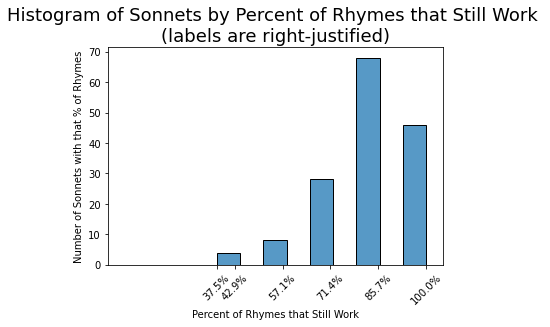

In [16]:
# and we graph them

ax = sns.histplot(accuracies)
ax.set_xlim(0.05, 1.05)
ax.set_title("Histogram of Sonnets by Percent of Rhymes that Still Work \n(labels are right-justified)",
            fontsize=18)

ax.set_xlabel("Percent of Rhymes that Still Work")
ax.set_ylabel("Number of Sonnets with that % of Rhymes")
myxlabels=[str(round(x*100, 1))+'%' for x in list(set(accuracies))]
plt.xticks(ticks=list(set(accuracies)), labels=myxlabels, rotation=45)
plt.show()

In [17]:
%%time

justthewordsmaam = [x[-2:] for x in anomalies]
#print(justthewordsmaam)

words = [item for sublist in justthewordsmaam for item in sublist]
#print(words)

d = Counter(words)
#print(d)

sordidwords = sorted(d.items(), key=lambda pair: pair[1], reverse=True)
commonsordid = [x for x in sordidwords if x[1] > 1]
print(commonsordid)

[('love', 12), ('alone', 9), ('prove', 9), ('gone', 6), ('are', 6), ('one', 5), ('eye', 5), ('tongue', 5), ('come', 4), ('wrong', 4), ('moan', 4), ('spent', 4), ('argument', 4), ('memory', 3), ('bear', 3), ('tomb', 3), ('blood', 3), ('dead', 3), ('forth', 3), ('worth', 3), ('care', 3), ('is', 3), ('near', 3), ('where', 3), ('doom', 3), ('die', 2), ('was', 2), ('majesty', 2), ('age', 2), ('were', 2), ('counterfeit', 2), ('song', 2), ('buried', 2), ('night', 2), ('even', 2), ('heaven', 2), ('past', 2), ('invent', 2), ('desert', 2), ('amiss', 2), ('remedy', 2), ('approve', 2), ('appear', 2), ('dumb', 2), ('affords', 2), ('words', 2), ('good', 2), ('there', 2), ('fiend', 2)]
Wall time: 0 ns
